# Imports Básicos e leitura do arquivo csv

In [ ]:
!pip install dask

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dask import dataframe as dd
import datetime 
import time
import seaborn as sns
sns.set()

In [2]:
plt.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
anuncios_olx = dd.read_csv('anuncios_resumo.csv', low_memory=False)
size = len(anuncios_olx)

# Análise Exploratória de Dados

Corrigindo os tipos de dados do dataframe

In [4]:
anuncios_olx['data_publicacao_anuncio'] = dd.to_datetime(anuncios_olx['data_publicacao_anuncio'], format='%Y-%m-%d %H:%M')
anuncios_olx['data_coleta_dados'] = dd.to_datetime(anuncios_olx['data_coleta_dados'], format='%Y-%m-%d %H:%M')

## Categoria mais relevante da OLX

Primeiro vamos ver qual é a categoria com mais anuncios na OLX

In [5]:
anuncios_olx['categoria'] = (anuncios_olx.categoria_completa
                             .str.extract(r'(.[\wA-Z\a-z0-9_-]+\;)')
                             .squeeze())

relevancia = (anuncios_olx
              .groupby(anuncios_olx.categoria)['url_lista']
              .count()
              .reset_index()
              .rename(columns={'categoria':'Categoria', 'url_lista':'Anuncios'})
              .compute())

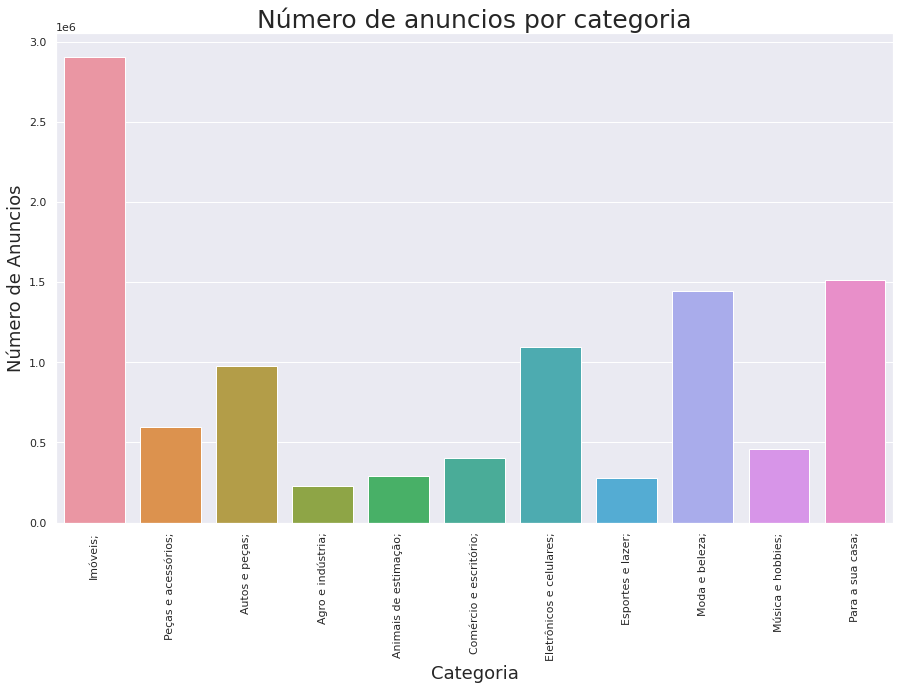

In [6]:
sns.barplot(x='Categoria', y='Anuncios', data=relevancia)


plt.title("Número de anuncios por categoria", fontsize=25)
plt.xlabel('Categoria', fontsize=18)
plt.ylabel('Número de Anuncios', fontsize=18)
plt.xticks(rotation=90)
plt.show()

Vemos que as três primeiras categorias são Imóveis, Itens para a sua casa, e Moda e Beleza.

## Anuncios por mês

In [7]:
anuncios_olx['mes_anuncio'] = anuncios_olx.data_publicacao_anuncio.dt.month
anuncios_olx['ano_anuncio'] = anuncios_olx.data_publicacao_anuncio.dt.year

In [8]:
anuncios_mes = (anuncios_olx
                .groupby('mes_anuncio')['url_lista']
                .count()
                .reset_index()
                .rename(columns={'mes_anuncio':'Mês', 'url_lista':'Anuncios'})
                .compute()
               )

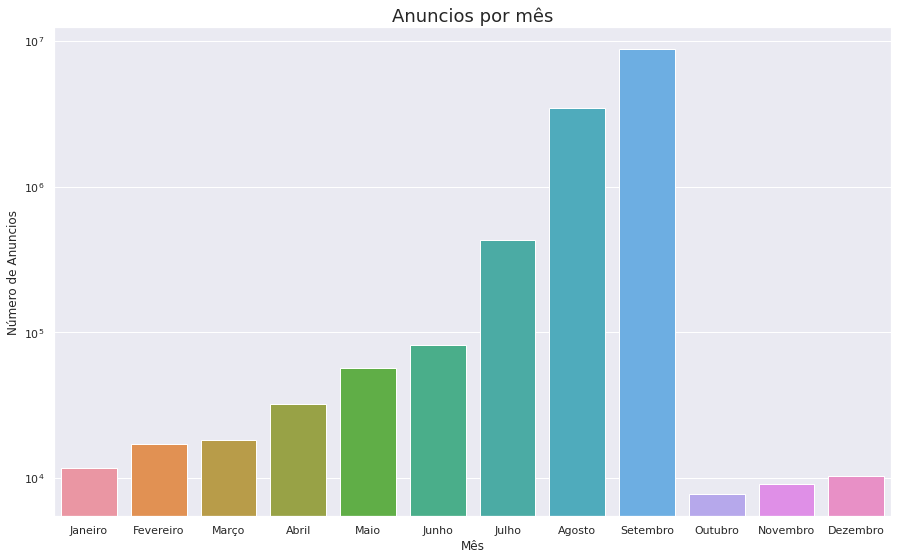

In [9]:
meses = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]

anuncios_mes['Mês'] = meses
g = sns.barplot(x='Mês', y='Anuncios', data=anuncios_mes)
g.set_yscale('log')

plt.title("Anuncios por mês", fontsize=18)
plt.xlabel('Mês')
plt.ylabel('Número de Anuncios')
plt.show()

In [137]:
anuncios_olx['local_estado'] = anuncios_olx.localizacao_completa.str.extract(r'(\DDD [\w]+)').squeeze()
local_estado = (anuncios_olx
                .groupby('local_estado')['url_lista']
                .count()
                .reset_index()
                .rename(columns={'local_estado':'Estado', 'url_lista':'Anuncios'})
                .compute()
               )

In [138]:
ddd_estado = {
'DDD 11':'SP', 'DDD 12':'SP', 'DDD 13':'SP', 'DDD 14':'SP', 'DDD 15':'SP', 'DDD 16':'SP', 'DDD 17':'SP', 'DDD 18':'SP', 'DDD 19':'SP',
'DDD 21':'RJ', 'DDD 22':'RJ', 'DDD 24':'RJ',
'DDD 27':'ES', 'DDD 28':'ES',
'DDD 31':'MG', 'DDD 32':'MG', 'DDD 33':'MG', 'DDD 34':'MG', 'DDD 35':'MG', 'DDD 37':'MG', 'DDD 38':'MG',
'DDD 41':'PR', 'DDD 42':'PR', 'DDD 43':'PR', 'DDD 44':'PR', 'DDD 45':'PR', 'DDD 46':'PR',
'DDD 47':'SC', 'DDD 48':'SC', 'DDD 49':'SC',
'DDD 51':'RS', 'DDD 53':'RS', 'DDD 54':'RS', 'DDD 55':'RS',
'DDD 68':'AC', 'DDD 96':'AP', 'DDD 92':'AM', 'DDD 97':'AM', 'DDD 91':'PA', 'DDD 93':'PA', 'DDD 94':'PA', 'DDD 69':'RO', 'DDD 95':'RR', 'DDD 63':'TO',
'DDD 82':'AL',
'DDD 71':'BA', 'DDD 73':'BA', 'DDD 74':'BA', 'DDD 75':'BA', 'DDD 77':'BA',
'DDD 85':'CE', 'DDD 88':'CE',
'DDD 98':'MA', 'DDD 99':'MA',
'DDD 83':'PB',
'DDD 81':'PE', 'DDD 87':'PE',
'DDD 86':'PI', 'DDD 89':'PI',
'DDD 84':'RN',
'DDD 79':'SE',
'DDD 61':'DF',
'DDD 62':'GO', 'DDD 64':'GO',
'DDD 65':'MT', 'DDD 66':'MT',
'DDD 67':'MS'
}

local_estado['Estado'] = local_estado['Estado'].map(ddd_estado)
local_estado = local_estado.groupby('Estado')['Anuncios'].sum().reset_index()

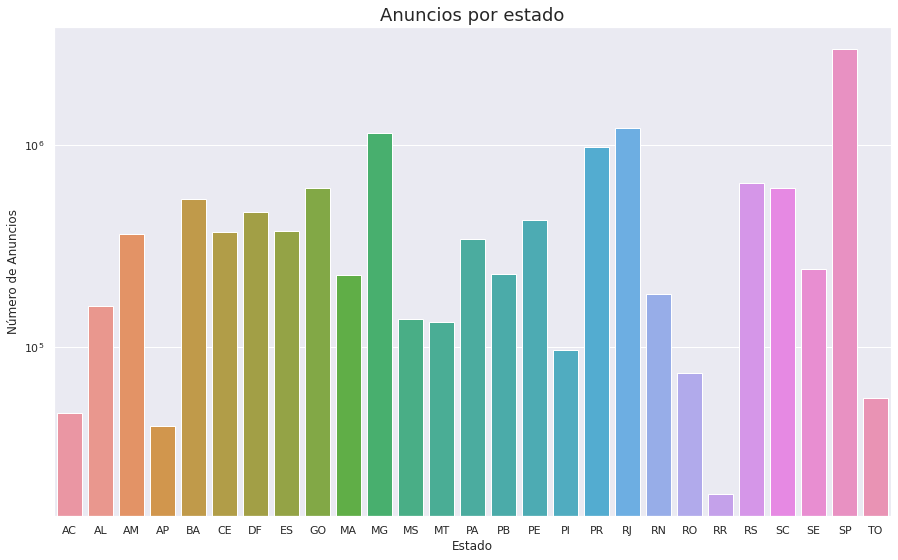

In [139]:
g = sns.barplot(x='Estado', y='Anuncios', data=local_estado)
g.set_yscale('log')

plt.title("Anuncios por estado", fontsize=18)
plt.xlabel('Estado')
plt.ylabel('Número de Anuncios')
plt.show()

# Intervalo de Confiança

In [10]:
n_sample = 50000
N = n_sample / size

sample = anuncios_olx['preco_anuncio'].sample(frac=N)
s = np.std(sample, ddof=1)
s_over_n = s / np.sqrt(n_sample)
mean = np.mean(sample)
LI = mean - 1.96 * s_over_n
LS = mean + 1.96 * s_over_n

(LI.compute(), LS.compute())

(269568.83393672435, 433169.13865950226)